<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


このラボでは、積み重ねられたチャートを使用して、データの視覚化に焦点を当てます。  
 SQLクエリを使用して必要なデータを抽出し、積み重ねられたチャートを適用して、データ内の構成と比較を分析します。

## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


 - 積み重ねられたチャートを使用してデータの構成を視覚化します。

 - 積み重ねられたチャートを使用して、異なるカテゴリの複数の変数を比較します。

 - 積み重ねられたチャートの視覚化内の傾向を分析します。

## Setup: Downloading and Loading the Data
**Install the libraries**


In [ ]:
# !pip install pandas

In [ ]:
# !pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [1]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'

### Step 2: Import necessary libraries and load the dataset


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.0})

### Load the data


In [17]:
df = pd.read_csv(url)

### Display the first few rows of the data to understand its structure


In [18]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

In [19]:
df['Age']


0        Under 18 years old
1           35-44 years old
2           45-54 years old
3           18-24 years old
4           18-24 years old
                ...        
65432       18-24 years old
65433       25-34 years old
65434       25-34 years old
65435       18-24 years old
65436       18-24 years old
Name: Age, Length: 65437, dtype: object

In [20]:
def convert_age_to_numeric(age_str):
    if age_str == 'Under 18 years old':
        return 18
    elif age_str == '18-24 years old':
        return 20
    elif age_str == '25-34 years old':
        return 30
    elif age_str == '35-44 years old':
        return 40
    elif age_str == '45-54 years old':
        return 50
    elif age_str == '55-64 years old':
        return 60
    elif age_str == '65 years or older':
        return 65
    else:
        return None

# Age
df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)
df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)
pd.concat([df['Age'], df['Age_numeric']], axis=1).head(10)



0

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



さまざまな年齢層にわたって、仕事の満足度スコア（ 'jobesatpoints_6`および `jobesatpoints_7`）の構成を視覚化します。  
これは、さまざまな人口統計にわたる満足度レベルの内訳を理解するのに役立ちます。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_6629/4124209994.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_sat_by_age = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


<Figure size 1200x600 with 0 Axes>

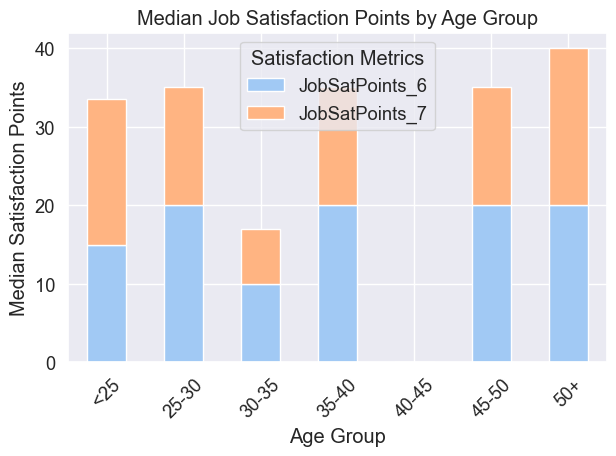

In [21]:
##Write your code here

# Create age groups
df['AgeGroup'] = pd.cut(df['Age_numeric'], bins=[0, 25, 30, 35, 40, 45, 50, 100], 
                        labels=['<25', '25-30', '30-35', '35-40', '40-45', '45-50', '50+'])

# Calculate median job satisfaction points by age group
job_sat_by_age = df.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create stacked bar chart
plt.figure(figsize=(12, 6))
job_sat_by_age.plot(kind='bar', stacked=True)
plt.title('Median Job Satisfaction Points by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Points')
plt.legend(title='Satisfaction Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


積み上げチャートを作成して、さまざまな雇用状況でジョブの満足度（ `jovesatpoints_6`および` jovesatpoints_7`）を比較します。これは、雇用タイプによって満足度がどのように異なるかを示します。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_6629/737287500.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

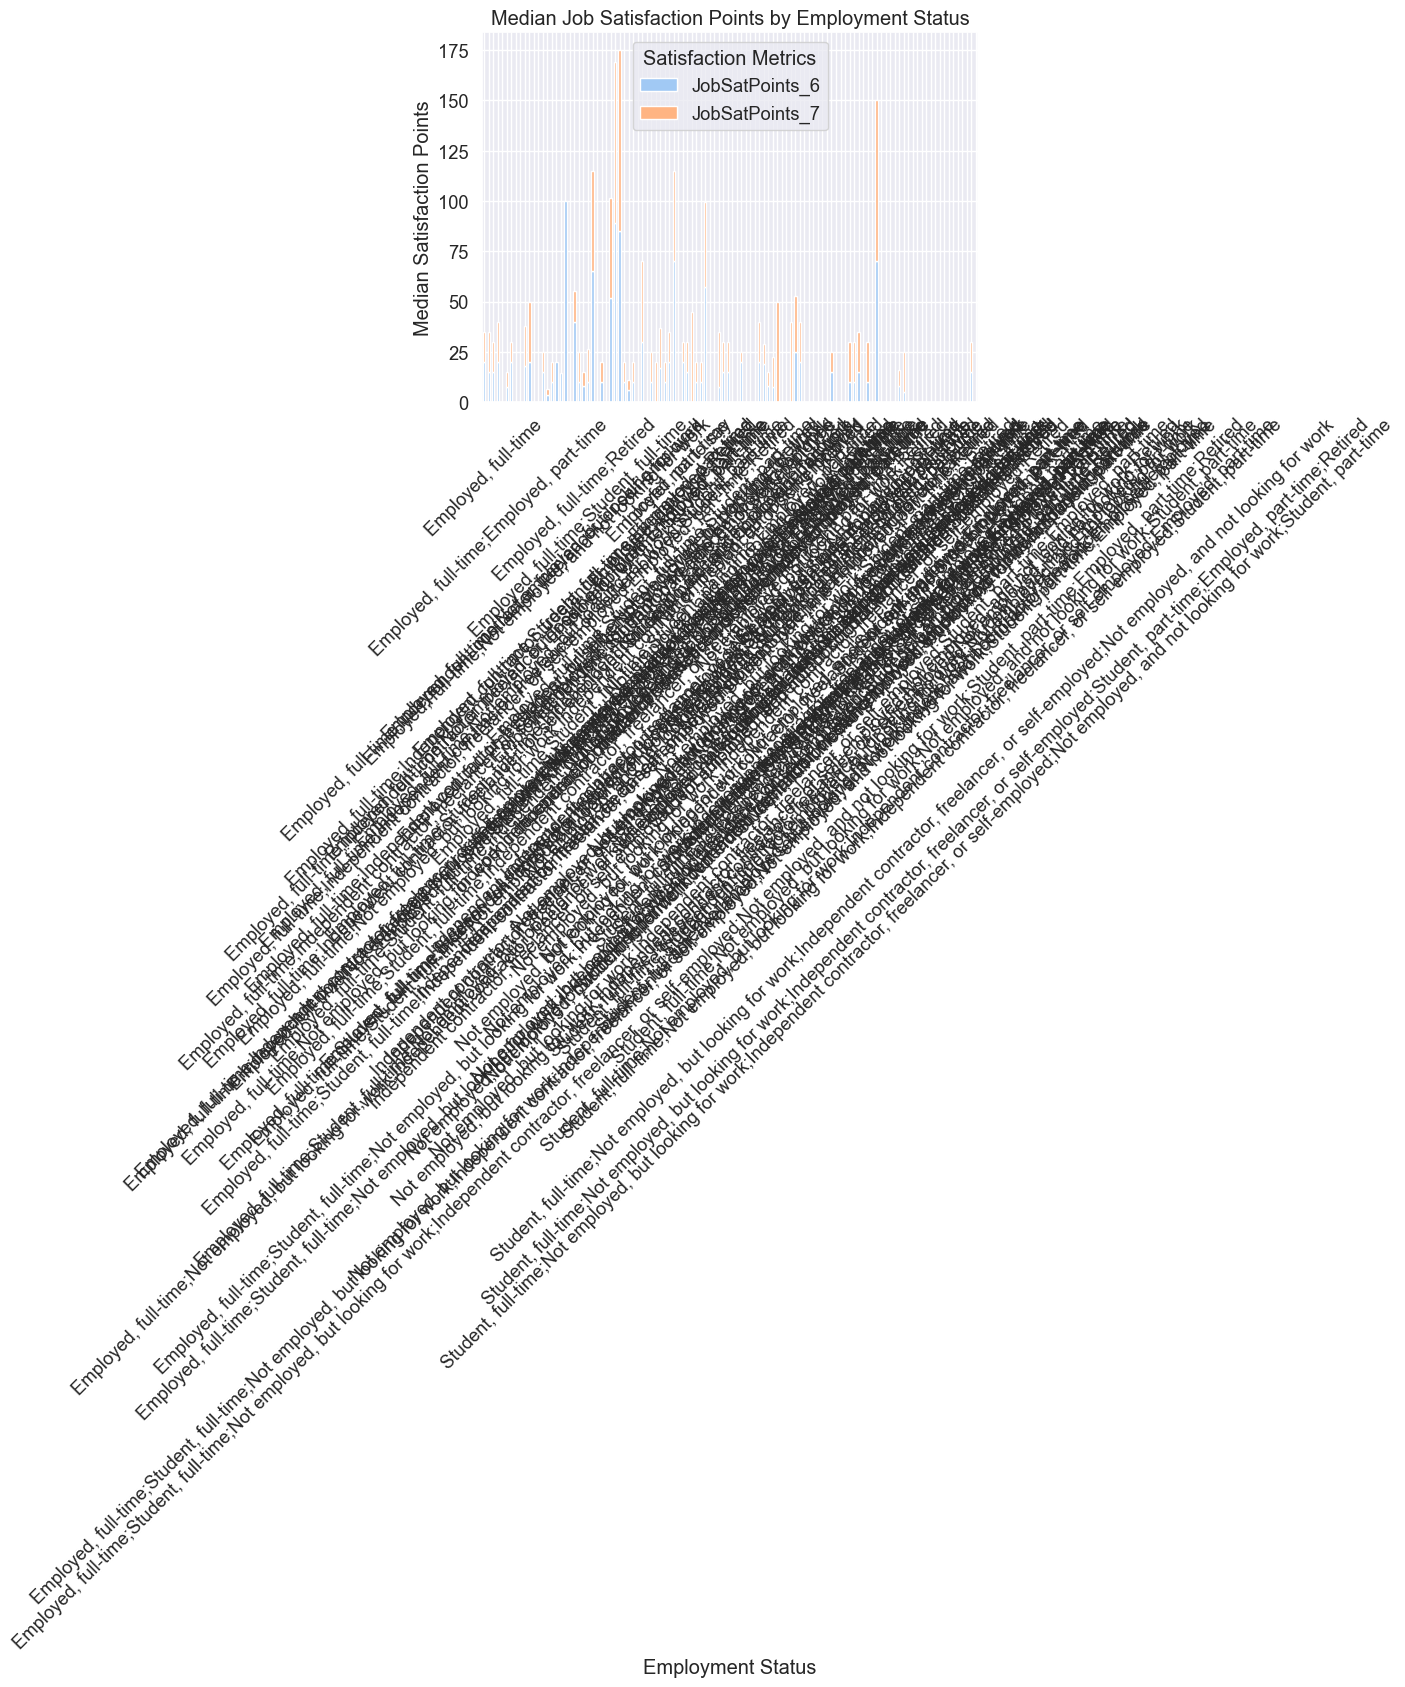

In [6]:
##Write your code here

# Create stacked bar chart for employment status
job_sat_by_emp = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

plt.figure(figsize=(12, 6))
job_sat_by_emp.plot(kind='bar', stacked=True)
plt.title('Median Job Satisfaction Points by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Points')
plt.legend(title='Satisfaction Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


#####  この積み重ねられたチャートは、30〜35歳の回答者向けに、補償（「compcearly」と仕事の満足度（ `jobeatpoints_6」）の構成を視覚化します。

<Figure size 1200x600 with 0 Axes>

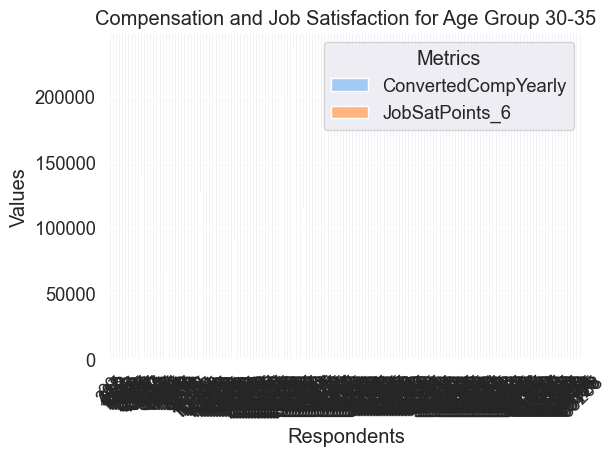

In [22]:
##Write your code here

age_filter = df[df['AgeGroup'] == '30-35']

# Create stacked bar chart for compensation and job satisfaction
plt.figure(figsize=(12, 6))
age_filter[['ConvertedCompYearly', 'JobSatPoints_6']].plot(kind='bar', stacked=True)
plt.title('Compensation and Job Satisfaction for Age Group 30-35')
plt.xlabel('Respondents')
plt.ylabel('Values')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


さまざまな年齢層の中央値補償と仕事の満足度指標を比較します。これにより、補償と満足度のレベルが年齢によってどのように異なるかを視覚化するのに役立ちます。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_6629/4106733877.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comp_sat_by_age = df.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()


<Figure size 1200x600 with 0 Axes>

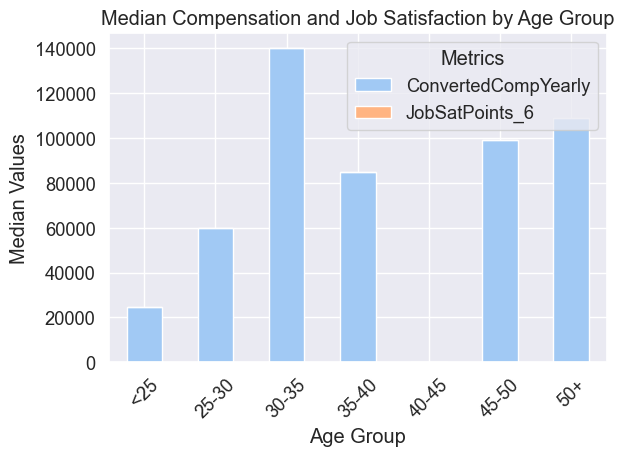

In [23]:
##Write your code here

# Create stacked bar chart for median compensation and job satisfaction across age groups
comp_sat_by_age = df.groupby('AgeGroup')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

plt.figure(figsize=(12, 6))
comp_sat_by_age.plot(kind='bar', stacked=True)
plt.title('Median Compensation and Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Values')
plt.legend(title='Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


さまざまな年齢層の回答者が学びたいと思う上位のデータベースを視覚化します。  
各年齢層の各データベースの割合を示す積み重ねられたチャートを作成します。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_6629/3668466063.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db_by_age = df.groupby('AgeGroup')['DatabaseWantToWorkWith'].apply(


<Figure size 1200x600 with 0 Axes>

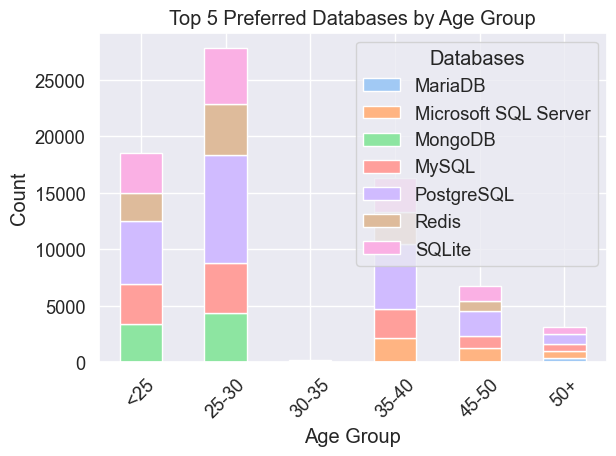

In [24]:
##Write your code here

# Create stacked chart for preferred databases by age group
# First, split the DatabaseWantToWorkWith column and count occurrences
db_counts = df['DatabaseWantToWorkWith'].str.split(';').explode().value_counts().head(5)
db_by_age = df.groupby('AgeGroup')['DatabaseWantToWorkWith'].apply(
    lambda x: x.str.split(';').explode().value_counts().head(5)
).unstack()

plt.figure(figsize=(12, 6))
db_by_age.plot(kind='bar', stacked=True)
plt.title('Top 5 Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Databases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


積み上げチャートを使用して、各職務満足度レベル内の雇用タイプの分布を分析します。これにより、さまざまな満足度の評価に雇用タイプがどのように分配されるかについての洞察が得られます。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_6629/4084964298.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


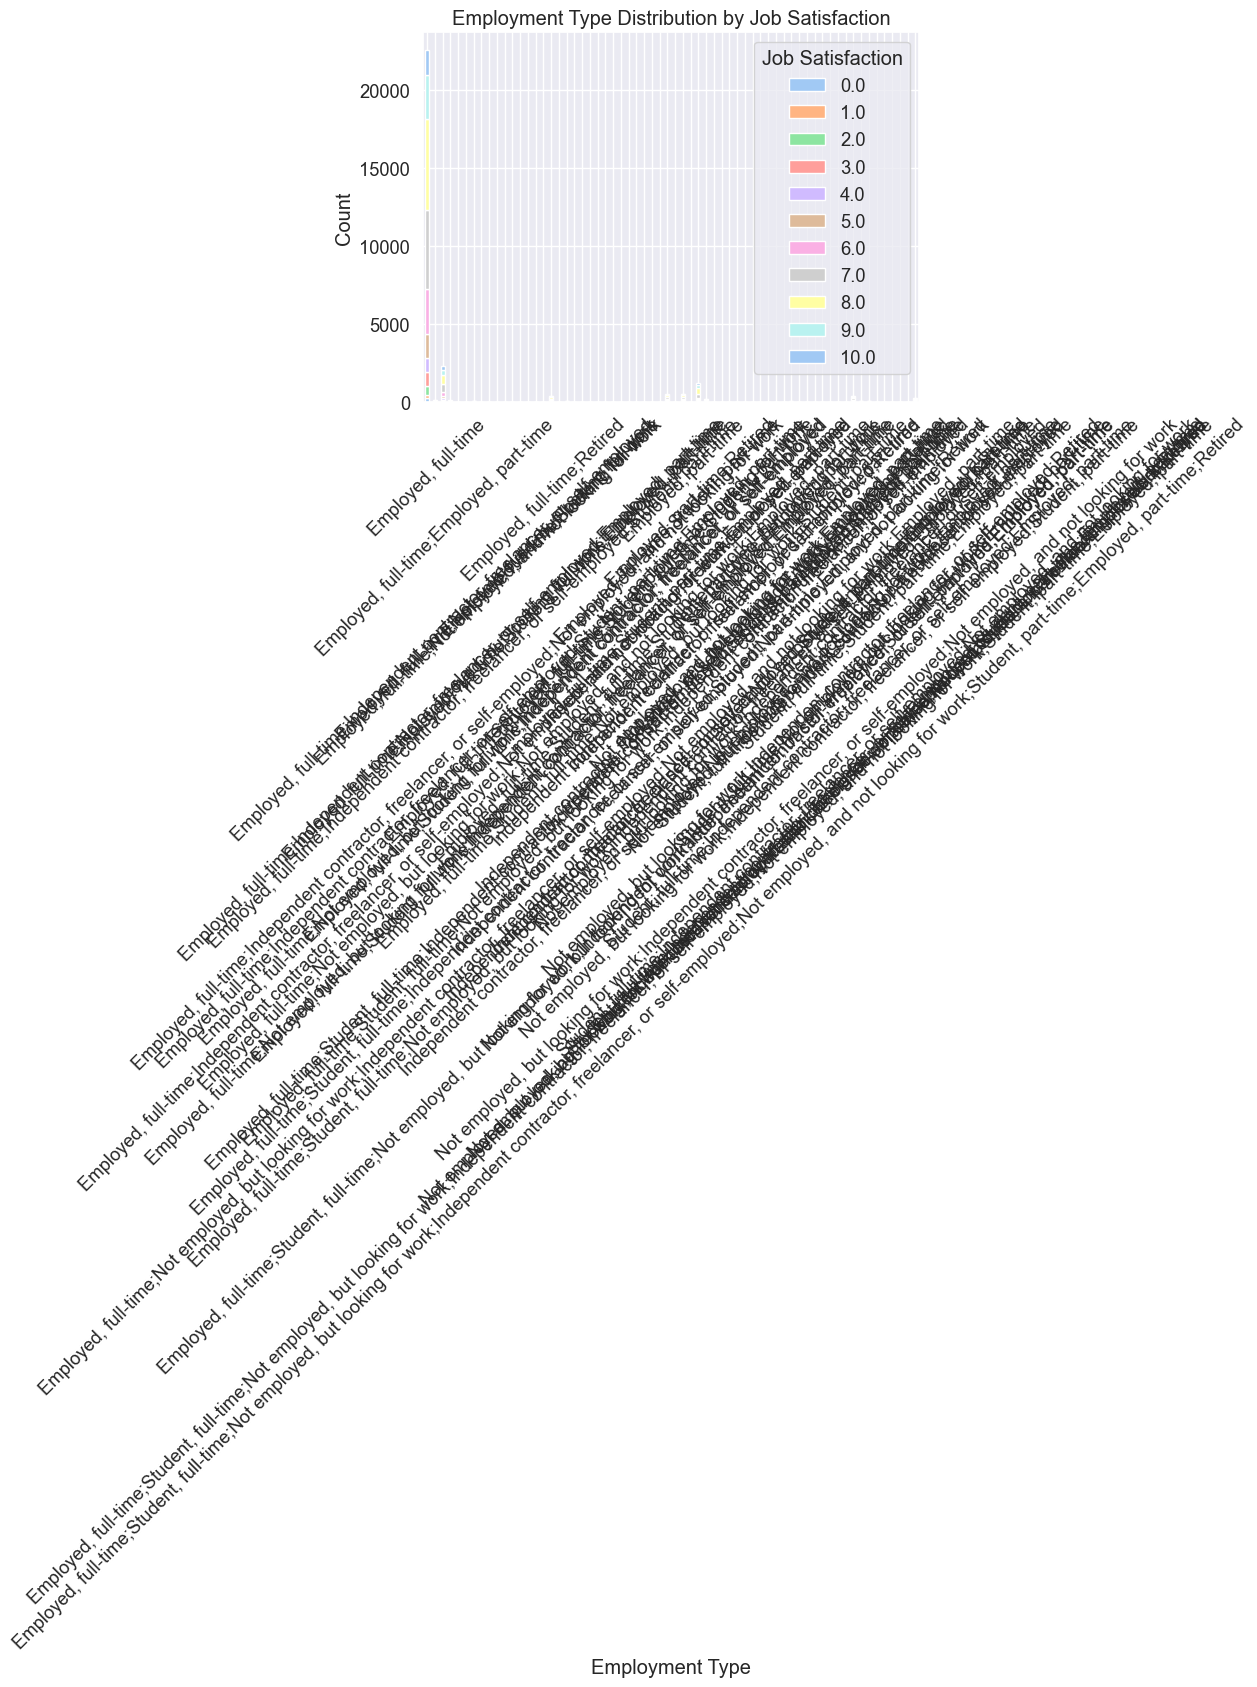

In [25]:
##Write your code here

# Create stacked chart for employment type by job satisfaction
emp_by_sat = pd.crosstab(df['Employment'], df['JobSat'])
emp_by_sat.plot(kind='bar', stacked=True)
plt.title('Employment Type Distribution by Job Satisfaction')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


プログラミング言語の好み（「LanguageAgeadmired」）が年齢層によってどのように異なるかを分析します。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_6629/1061944006.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_by_age = df.groupby('AgeGroup')['LanguageAdmired'].apply(


<Figure size 1200x600 with 0 Axes>

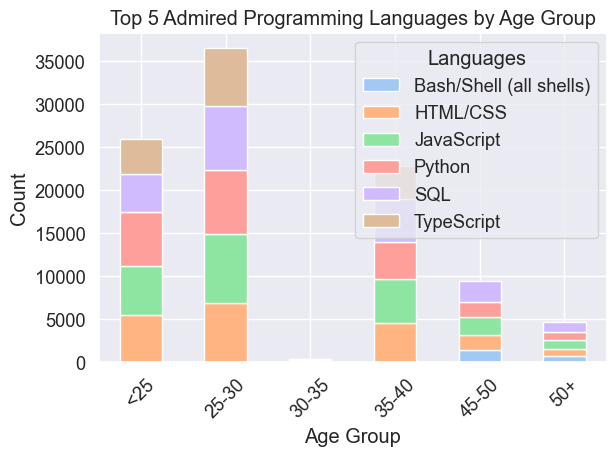

In [26]:
##Write your code here

# Create stacked chart for preferred programming languages by age group
lang_by_age = df.groupby('AgeGroup')['LanguageAdmired'].apply(
    lambda x: x.str.split(';').explode().value_counts().head(5)
).unstack()

plt.figure(figsize=(12, 6))
lang_by_age.plot(kind='bar', stacked=True)
plt.title('Top 5 Admired Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Languages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_6629/3613688566.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

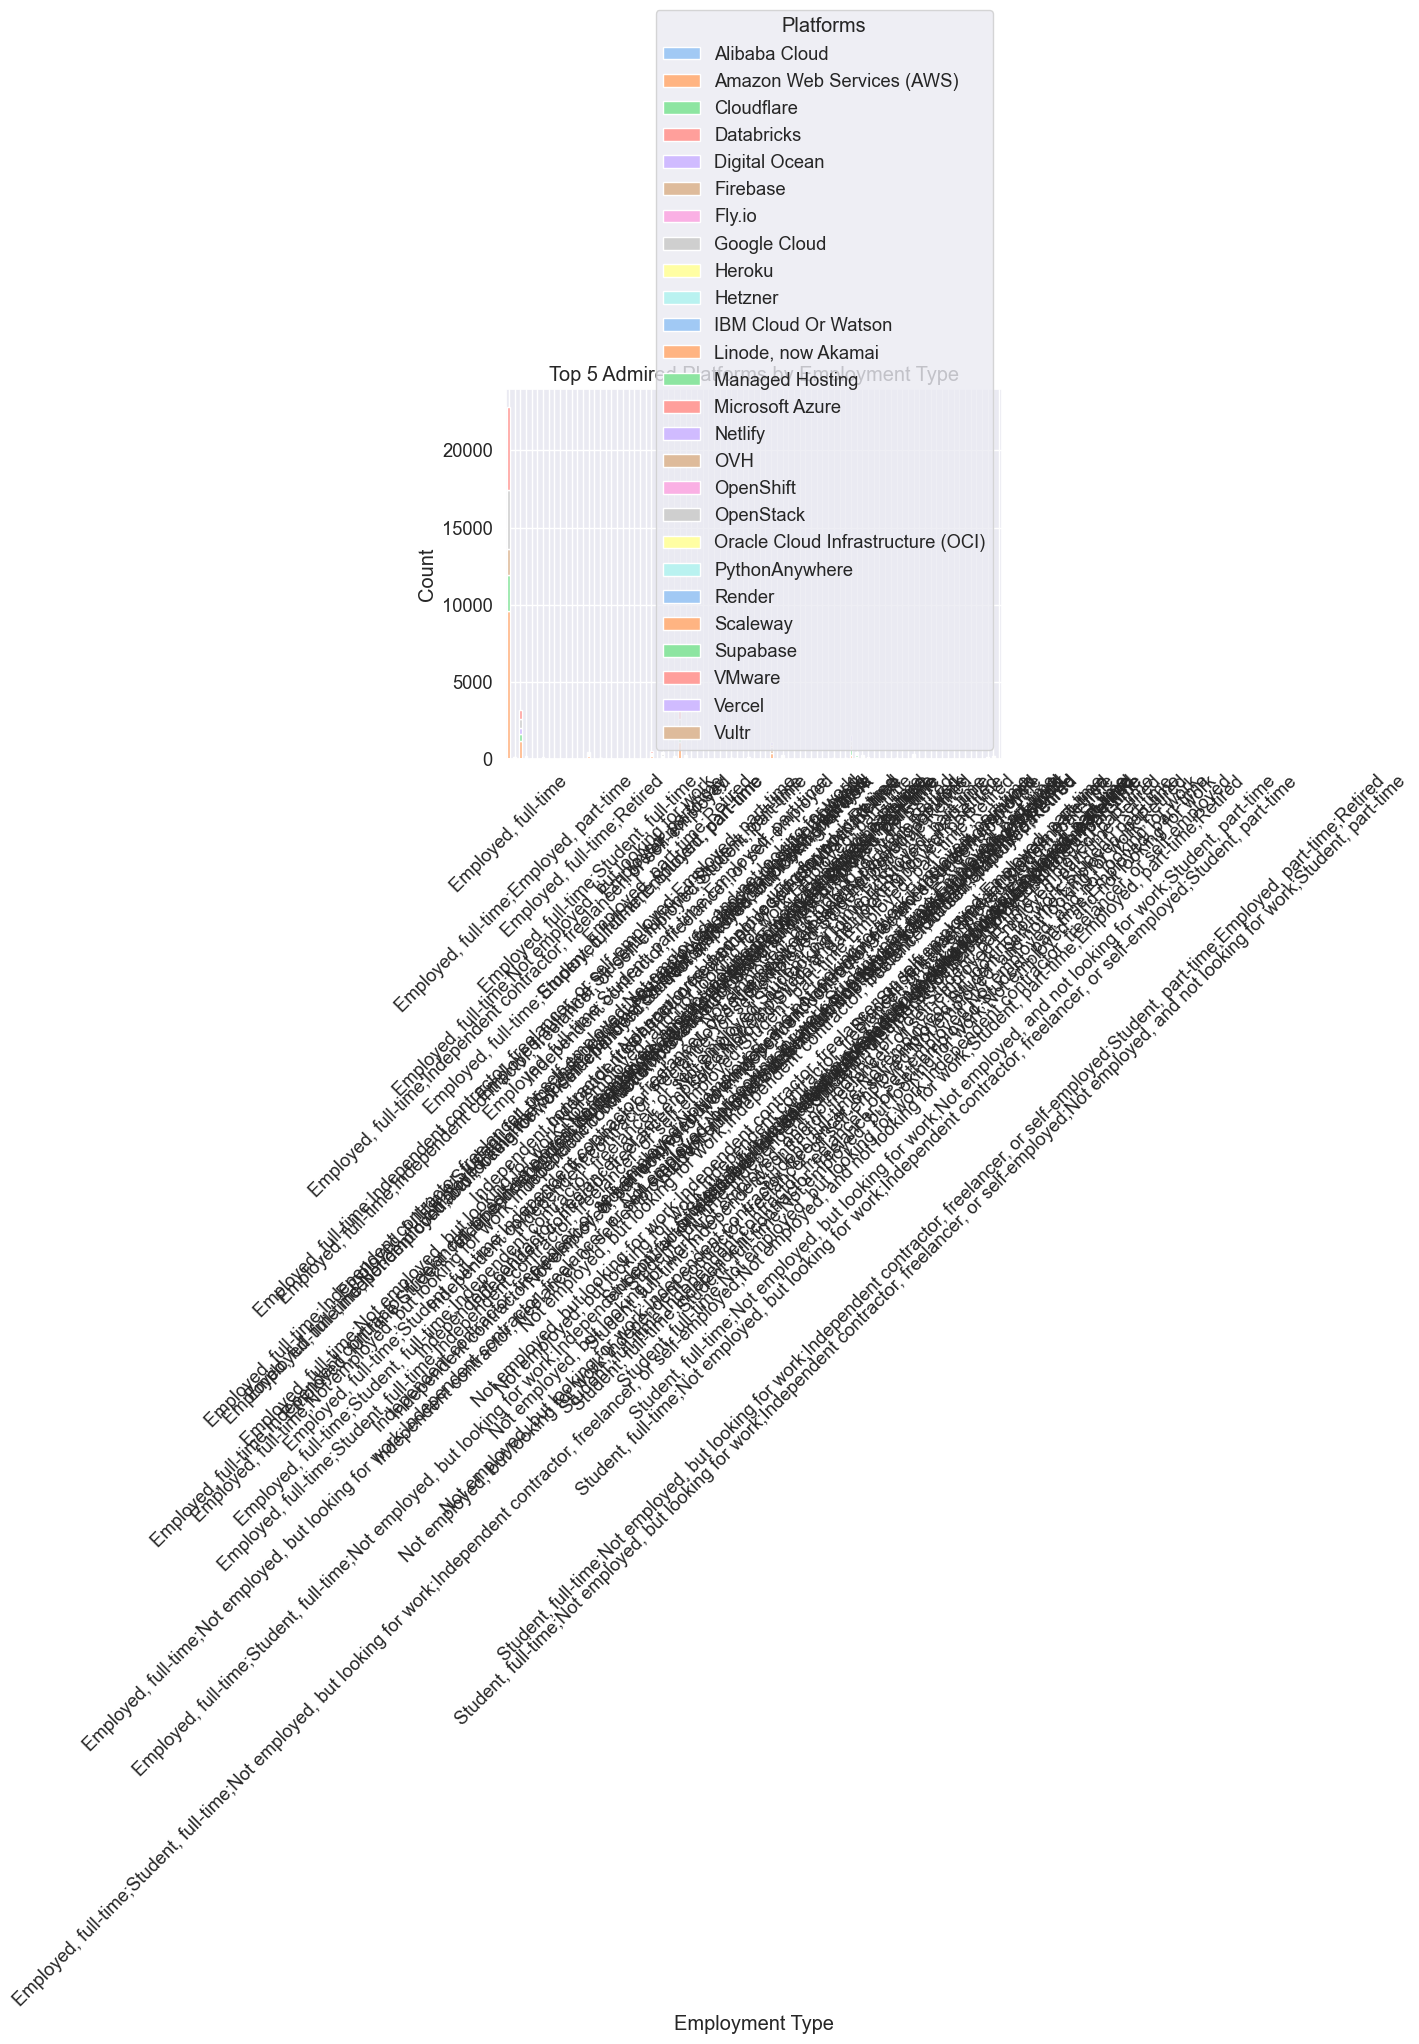

In [27]:
##Write your code here

# Create stacked chart for technology adoption by employment type
platform_by_emp = df.groupby('Employment')['PlatformAdmired'].apply(
    lambda x: x.str.split(';').explode().value_counts().head(5)
).unstack()

plt.figure(figsize=(12, 6))
platform_by_emp.plot(kind='bar', stacked=True)
plt.title('Top 5 Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Platforms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


このラボでは、積み重ねられたチャートを使用して、データセット内の構成と比較を理解することに焦点を当てました。積み重ねられたチャートは、年齢層や雇用タイプにわたって、仕事の満足度、補償、および優先データベースに関する洞察を提供しました。

## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
